# 데이터 기초 분석

공정 조건과 물성치 간의 대략적인 추세를 살펴보자.

## 데이터 읽기

특정 실험(장비, 소재, 적층 방향 동일)의 시편 데이터들 불러오기
현재 한 시편의 이미지 파일마다 id만 다른 동일한 내용의 json 파일 존재. 각 시편의 첫번째 json 파일 사용


In [1]:
import os
import json
from datetime import datetime
import pandas as pd
import numpy as np

import env

In [2]:
data_dir = os.path.join(env.DATA_DIR_ROOT, '2.sus_0_1circle_process', 'CENTER')

data_dir

'D:\\Data\\AI_DB(CYAUTOTECH)\\2.sus_0_1circle_process\\CENTER'

In [3]:
!dir "$data_dir\\IMAGE"

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 5AC0-12C2

 D:\Data\AI_DB(CYAUTOTECH)\2.sus_0_1circle_process\CENTER\IMAGE 디렉터리

2022-06-23  오후 05:51    <DIR>          .
2022-06-23  오후 05:51    <DIR>          ..
2022-06-23  오후 05:17    <DIR>          0
2022-06-23  오후 05:19    <DIR>          1
2022-06-23  오후 05:22    <DIR>          10
2022-06-23  오후 05:24    <DIR>          11
2022-06-23  오후 05:26    <DIR>          12
2022-06-23  오후 05:29    <DIR>          13
2022-06-23  오후 05:32    <DIR>          14
2022-06-23  오후 05:34    <DIR>          15
2022-06-23  오후 05:37    <DIR>          2
2022-06-23  오후 05:39    <DIR>          3
2022-06-23  오후 05:41    <DIR>          4
2022-06-23  오후 05:44    <DIR>          5
2022-06-23  오후 05:46    <DIR>          6
2022-06-23  오후 05:49    <DIR>          7
2022-06-23  오후 05:51    <DIR>          8
2022-06-23  오후 05:54    <DIR>          9
               0개 파일                   0 바이트
              18개 디렉터리  1,830,195,093,504 바이트 남음


In [4]:
%%time

data = {}
json_dir = os.path.join(data_dir, 'JSON')

for sample_id in os.listdir(json_dir):
#     print(sample_id)
    meta_info = None
    
    json_file = os.listdir(os.path.join(json_dir, sample_id))[0]
    
    with open(os.path.join(json_dir, sample_id, json_file), encoding='utf-8') as f:
        _info = json.load(f)

        if meta_info is None:
            meta_info = {k:set() for k in _info.keys()}

        for k, v in _info.items():
            if k != 'input 식별자 ':
                meta_info[k].add(v)
                    
    data[int(sample_id)] = meta_info

Wall time: 275 ms


In [5]:
data[13]

{'input 식별자 ': set(),
 '소재 ': {' SUS'},
 '소재 사이즈 ': {' 30㎛'},
 '장비종류 ': {' Vulcan 300'},
 '산소농도 ': {' 0.1'},
 '챔버온도 ': {' 20℃'},
 '적층두께 ': {' 40㎛'},
 '해칭간격 ': {' 0.1mm'},
 '적층방향 ': {' 0'},
 '레이어수 ': {' 375'},
 '데이터셋타입 ': {' 0'},
 '항복강도 ': {' 360.8MPa'},
 '인장강도 ': {' 489.79MPa'},
 '연신율 ': {' 23.1%'},
 '밀도 ': {' 7.90'},
 'laser_speed': {'264'},
 'laser_power': {'1300'}}

## 데이터 전처리

빈 칸 없애기, 단위 처리 등



In [6]:
import re
re_num = re.compile(r'([0-9\.]+)(.*)')

In [7]:
materials = ['SUS']
facilities = ['Vulcan 300']

data_list = []
for i in range(16):
    _data = {k.strip():list(v)[0].strip() for k, v in data[i].items() if len(v) > 0}
    
    __data = {}
    for k, v in _data.items():
        if k == '소재':
            __data[k] = materials.index(v)
        elif k == '장비종류':
            __data[k] = facilities.index(v)
        elif k == '적층방향' or k == '데이터셋타입':
            __data[k] = int(v)
        else:
            val, unit = re_num.match(v).groups()
            k = k if len(unit) == 0 else f'{k}({unit})'
            __data[k] = float(val)
    
    data_list.append(__data)

In [8]:
df = pd.DataFrame(data_list)
df['laser_density'] = df['laser_power'] / df['laser_speed']

print(json_dir)
df

D:\Data\AI_DB(CYAUTOTECH)\2.sus_0_1circle_process\CENTER\JSON


,소재,소재 사이즈(㎛),장비종류,산소농도,챔버온도(℃),적층두께(㎛),해칭간격(mm),적층방향,레이어수,데이터셋타입,항복강도(MPa),인장강도(MPa),연신율(%),밀도,laser_speed,laser_power,laser_density
0,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,0.00,0.00,40.4,7.81,312.0,700.0,2.243590
1,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,476.22,611.24,40.4,7.82,264.0,700.0,2.651515
2,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,466.05,602.48,42.7,7.82,360.0,700.0,1.944444
3,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,483.13,599.35,40.8,7.80,408.0,700.0,1.715686
4,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,469.09,577.51,39.2,7.82,264.0,900.0,3.409091
5,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,423.57,533.57,32.7,7.82,312.0,900.0,2.884615
6,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,395.18,490.37,19.2,7.87,360.0,900.0,2.500000
7,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,390.88,502.45,23.1,7.78,408.0,900.0,2.205882
8,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,466.94,587.99,35.0,7.80,264.0,1100.0,4.166667
9,0,30.0,0,0.1,20.0,40.0,0.1,0,375.0,0,457.77,574.32,34.6,7.83,312.0,1100.0,3.525641


# 데이터 분석

In [9]:
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams['font.family'] = 'Malgun Gothic'

def plot_annot(df_plot, x_col, y_cols, figsize=(24, 5)):
    
    fig, ax = plt.subplots(1, len(y_cols), figsize=figsize)
    for i, c in enumerate(y_cols):
        x = df_plot[x_col]
        y = df_plot[c]
        ax[i].scatter(x, y)
        ax[i].set_title(c)
        ax[i].set_xlabel(x_col)

        for (_idx, _x, _y) in zip(x.index, x, y):
            ax[i].annotate(_idx, (_x, _y))

## 0번 시편 제외 전체 데이터 분석 (항복강도, 인장강도 0)

In [10]:
_idx = [True] * 16

_idx[0] = False
# _idx[6] = False
# _idx[7] = False

# _idx[12] = False

df_corr = df.loc[_idx, :].iloc[:, 10:].corr()
df_corr

,항복강도(MPa),인장강도(MPa),연신율(%),밀도,laser_speed,laser_power,laser_density
항복강도(MPa),1.000000,0.969893,0.828431,-0.234890,0.026483,-0.391727,-0.359706
인장강도(MPa),0.969893,1.000000,0.882030,-0.156838,-0.070978,-0.421773,-0.312233
연신율(%),0.828431,0.882030,1.000000,-0.062027,-0.184292,-0.557634,-0.330669
밀도,-0.234890,-0.156838,-0.062027,1.000000,-0.447175,0.013338,0.304194
laser_speed,0.026483,-0.070978,-0.184292,-0.447175,1.000000,-0.042927,-0.632674
laser_power,-0.391727,-0.421773,-0.557634,0.013338,-0.042927,1.000000,0.786052
laser_density,-0.359706,-0.312233,-0.330669,0.304194,-0.632674,0.786052,1.000000


### 공정변수 vs 기계적 특성치 분포

In [11]:
y_cols = df.columns[10:14].tolist()
df_plot = df.loc[_idx, :]

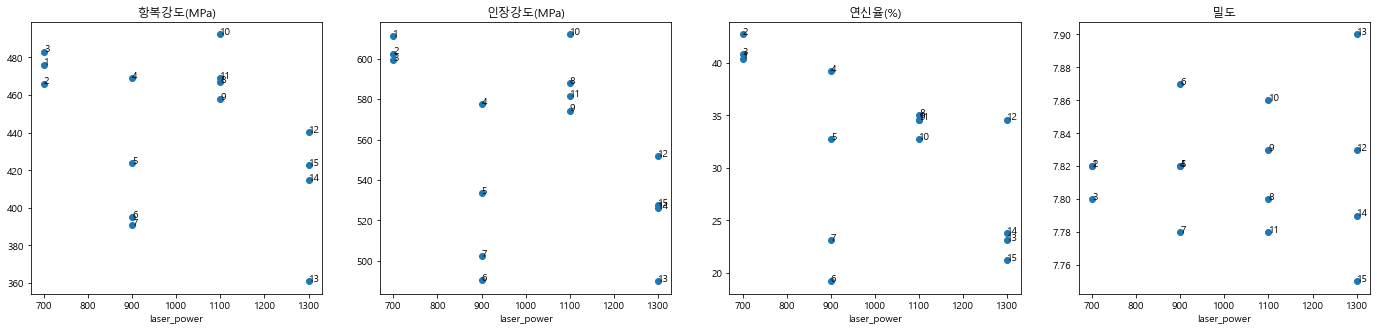

In [12]:
plot_annot(df_plot, 'laser_power', y_cols)

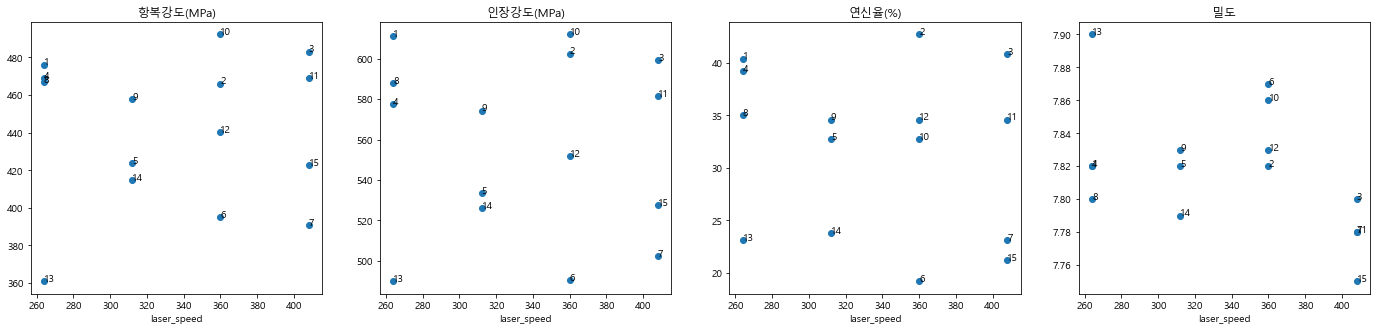

In [13]:
plot_annot(df_plot, 'laser_speed', y_cols)

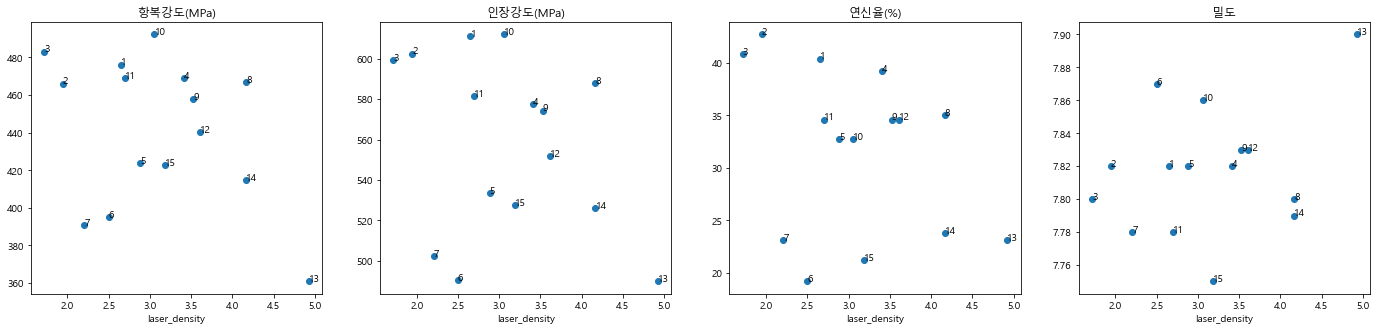

In [14]:
plot_annot(df_plot, 'laser_density', y_cols)

### 밀도 vs 타 특성치 분포

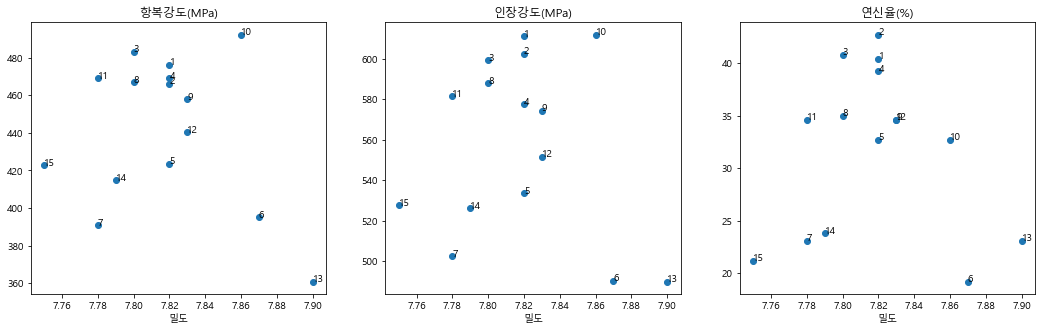

In [15]:
y_cols = df.columns[10:13].tolist()

plot_annot(df_plot, '밀도', y_cols, figsize=(18, 5))

## 이상치 제외 데이터 분석 (0, 6, 7 번 제외)

In [16]:
_idx = [True] * 16

_idx[0] = False
_idx[6] = False
_idx[7] = False
# _idx[15] = False

df_corr = df.loc[_idx, :].iloc[:, 10:].corr()
df_corr

,항복강도(MPa),인장강도(MPa),연신율(%),밀도,laser_speed,laser_power,laser_density
항복강도(MPa),1.000000,0.965128,0.769784,-0.268857,0.248466,-0.599208,-0.669268
인장강도(MPa),0.965128,1.000000,0.826528,-0.124456,0.145424,-0.685406,-0.664836
연신율(%),0.769784,0.826528,1.000000,0.029223,-0.019731,-0.842839,-0.671141
밀도,-0.268857,-0.124456,0.029223,1.000000,-0.482941,0.033864,0.361724
laser_speed,0.248466,0.145424,-0.019731,-0.482941,1.000000,0.031819,-0.583537
laser_power,-0.599208,-0.685406,-0.842839,0.033864,0.031819,1.000000,0.778034
laser_density,-0.669268,-0.664836,-0.671141,0.361724,-0.583537,0.778034,1.000000


### 공정변수 vs 기계적 특성치 분포

In [17]:
y_cols = df.columns[10:14].tolist()
df_plot = df.loc[_idx, :]

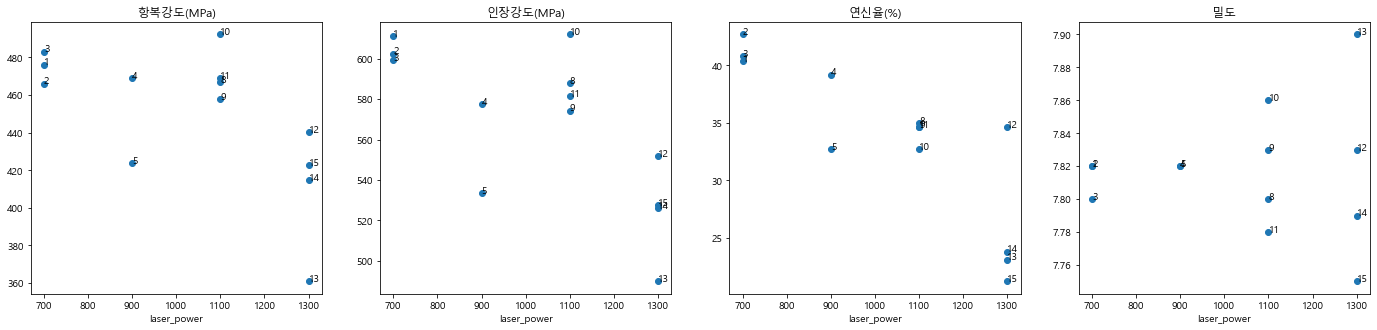

In [18]:
plot_annot(df_plot, 'laser_power', y_cols)

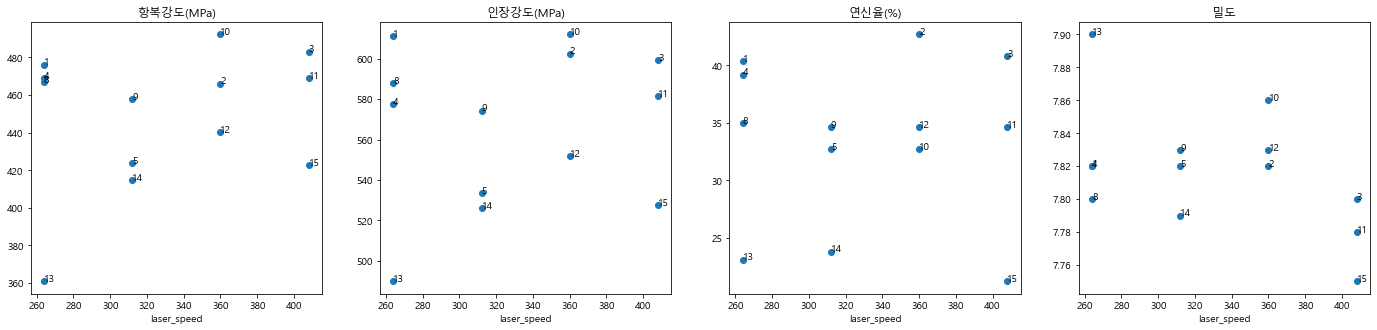

In [19]:
plot_annot(df_plot, 'laser_speed', y_cols)

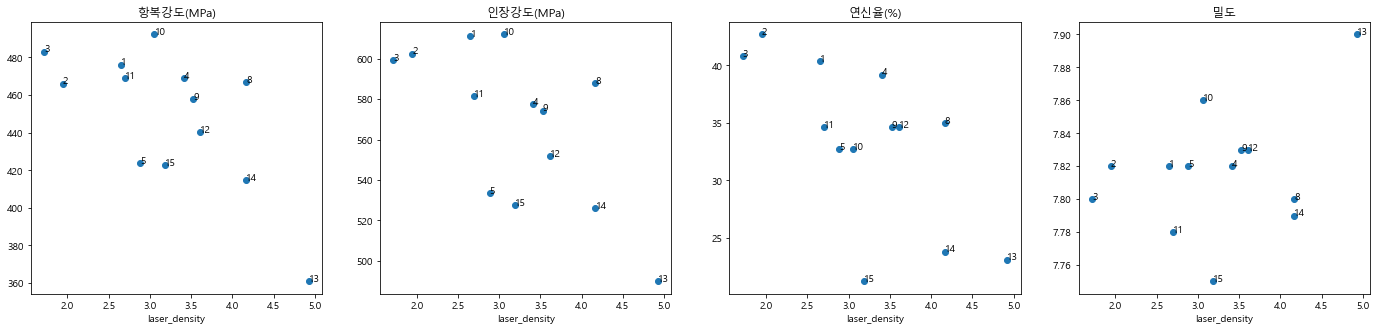

In [20]:
plot_annot(df_plot, 'laser_density', y_cols)

### 밀도 vs 타 특성치 분포

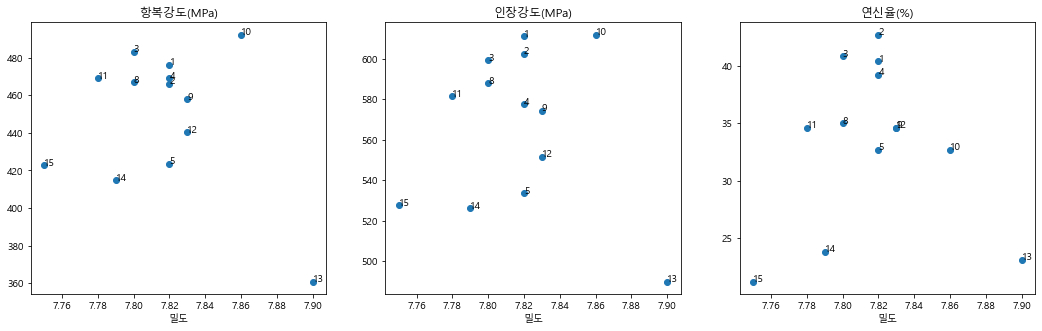

In [21]:
y_cols = df.columns[10:13].tolist()

plot_annot(df_plot, '밀도', y_cols, figsize=(18, 5))